# Beer Advocate's Top 250 Beers

This short project showcases how to scrape data from a website (in this case, beeradvocate: https://www.beeradvocate.com/beer/top-rated/), do some data cleaning and feature engineering, and then develop insights. I find that Stouts and IPAs make up 68% of the top 250-rated beers. Moreover, just 5 breweries make about 1/3rd of the highest rated beers!

In [287]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

# web scraping
import requests
from bs4 import BeautifulSoup

In [211]:
# The beers I'll be looking at
url = 'https://www.beeradvocate.com/beer/top-rated/'
r = requests.get(url)
soup = BeautifulSoup(r.content, 'html.parser')

In [28]:
print(soup.prettify())

<!DOCTYPE html>
<html class="Public NoJs uix_javascriptNeedsInit LoggedOut Sidebar Responsive pageIsLtr not_hasTabLinks hasSearch is-sidebarOpen hasRightSidebar is-setWidth navStyle_0 pageStyle_0 hasFlexbox" dir="LTR" id="XenForo" lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=Edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <base href="https://www.beeradvocate.com/community/"/>
  <script>
   var _b = document.getElementsByTagName('base')[0], _bH = "https://www.beeradvocate.com/community/";
			if (_b && _b.href != _bH) _b.href = _bH;
  </script>
  <title>
   Top 250 Rated Beers | BeerAdvocate
  </title>
  <noscript>
   <style>
    .JsOnly, .jsOnly { display: none !important; }
   </style>
  </noscript>
  <link href="css.php?css=xenforo,form,public&amp;style=6&amp;dir=LTR&amp;d=1653795778" rel="stylesheet"/>
  <link href="css.php?css=login_bar,moderato

In [34]:
beer_table = soup.find(id='ba-content')

In [35]:
beer_table

<div id="ba-content">
<div style="margin:0; padding:0;">
<ul class="tabs xf_tabs" style="margin: 0px 0px 20px 0px !important;">
<li class="active xf_tabs"><a href="/beer/top-rated/">Top 250</a></li>
<li class="xf_tabs"><a href="/beer/top-styles/">Styles</a></li>
<li class="xf_tabs"><a href="/beer/trending/">Trending</a></li>
<li class="xf_tabs"><a href="/beer/top-new/">New</a></li>
<li class="xf_tabs"><a href="/beer/fame/">Fame</a></li>
<li class="xf_tabs"><a href="/beer/popular/">Popular</a></li>
<li class="xf_tabs"><a href="/beer/worst/">Worst</a></li>
</ul>
</div>
<h2>The legendary Top 250 Rated Beers on BeerAdvocate, and arguably the best beers in the world.</h2>
<div style="margin:10px 0px;">
<b><i aria-hidden="true" class="fa fa-check" style="color:#E03030;"></i> You've reviewed 0 beers on this list.</b> <a href="/community/login/"><b>Log in</b></a> to begin your beer adventure.</div>
<div style="font-size:1.25em; margin:10px 0px;">
<form action="/beer/top-rated/" method="get" st

In [54]:
# getting name, brand and beer style
beer_table.find_all('tr')[1].find_all('td')

[<td align="center" bgcolor="#F7F7F7" class="hr_bottom_light" valign="top"><span style="font-weight:bold;color:#666666;">1</span></td>,
 <td align="left" class="hr_bottom_light" valign="top"><a href="/beer/profile/23222/78820/"><b>Kentucky Brunch Brand Stout</b></a><span class="muted"><br/><a href="/beer/profile/23222/">Toppling Goliath Brewing Company</a><br/><a href="/beer/top-styles/157/">Stout - American Imperial</a> | 12.00%</span></td>,
 <td align="left" class="hr_bottom_light" valign="top"><b>898</b></td>,
 <td align="left" class="hr_bottom_light" valign="top"><b>4.83</b></td>,
 <td align="left" class="hr_bottom_light" valign="top"></td>]

In [66]:
# Getting the rank
beer_table.find_all('tr')[1].find_all('td')[0].text

'1'

In [72]:
beer_table.find_all('tr')[1].find_all('td')[1]

<td align="left" class="hr_bottom_light" valign="top"><a href="/beer/profile/23222/78820/"><b>Kentucky Brunch Brand Stout</b></a><span class="muted"><br/><a href="/beer/profile/23222/">Toppling Goliath Brewing Company</a><br/><a href="/beer/top-styles/157/">Stout - American Imperial</a> | 12.00%</span></td>

In [96]:
# Getting the alcohol percentage
beer_table.find_all('tr')[1].find_all('td')[1].find('span').text.split('|')[-1]

' 12.00%'

In [87]:
# Getting the beer name, brewery, and style 
beer_table.find_all('tr')[1].find_all('td')[1].find_all('a')

[<a href="/beer/profile/23222/78820/"><b>Kentucky Brunch Brand Stout</b></a>,
 <a href="/beer/profile/23222/">Toppling Goliath Brewing Company</a>,
 <a href="/beer/top-styles/157/">Stout - American Imperial</a>]

In [108]:
# Once I tested getting the individual attributes of the beer, it's good practice to turn it into a function 
# for ease of use.

def get_info(row):
    rank = row.find_all('td')[0].text
    beer_name = row.find_all('td')[1].find_all('a')[0].text
    brewery = row.find_all('td')[1].find_all('a')[1].text
    style = row.find_all('td')[1].find_all('a')[2].text
    alcohol_pct = row.find_all('td')[1].find('span').text.split('|')[-1]
    n_ratings = row.find_all('td')[2].text
    avg_rating = row.find_all('td')[3].text

    output = {'rank': rank,
        'beer_name':beer_name,
        'brewery': brewery,
        'style':style,
        'alcohol_pct':alcohol_pct,
        'n_ratings':n_ratings,
        'avg_rating':avg_rating
    }
    return output

In [109]:
get_info(beer_table.find_all('tr')[3])

{'rank': '3',
 'beer_name': 'Abraxas - Barrel-Aged',
 'brewery': 'Perennial Artisan Ales',
 'style': 'Stout - American Imperial',
 'alcohol_pct': ' 11.00%',
 'n_ratings': '1,644',
 'avg_rating': '4.73'}

In [111]:
beer_table.find_all('tr')

251

In [113]:
beers = []
for b in beer_table.find_all('tr')[1:]:
    beers.append(get_info(b))

In [114]:
beers

[{'rank': '1',
  'beer_name': 'Kentucky Brunch Brand Stout',
  'brewery': 'Toppling Goliath Brewing Company',
  'style': 'Stout - American Imperial',
  'alcohol_pct': ' 12.00%',
  'n_ratings': '898',
  'avg_rating': '4.83'},
 {'rank': '2',
  'beer_name': 'Marshmallow Handjee',
  'brewery': '3 Floyds Brewing Co.',
  'style': 'Stout - Russian Imperial',
  'alcohol_pct': ' 15.00%',
  'n_ratings': '1,785',
  'avg_rating': '4.73'},
 {'rank': '3',
  'beer_name': 'Abraxas - Barrel-Aged',
  'brewery': 'Perennial Artisan Ales',
  'style': 'Stout - American Imperial',
  'alcohol_pct': ' 11.00%',
  'n_ratings': '1,644',
  'avg_rating': '4.73'},
 {'rank': '4',
  'beer_name': 'Vanilla Bean Assassin',
  'brewery': 'Toppling Goliath Brewing Company',
  'style': 'Stout - American Imperial',
  'alcohol_pct': ' 12.80%',
  'n_ratings': '109',
  'avg_rating': '4.8'},
 {'rank': '5',
  'beer_name': "Hunahpu's Imperial Stout - Double Barrel Aged",
  'brewery': 'Cigar City Brewing',
  'style': 'Stout - Americ

In [115]:
beer_df = pd.DataFrame(beers)

In [130]:
# It's a good idea to save your raw data 
# beer_df.to_csv('beer_advocate.csv')

## Data Cleaning
Here I go through some basic data cleaning. First I examine the data to see what data types there are and if where there are missing values. Next, I jump into turning the alcohol % strings into usable numbers. I also split the beer style into style families and substyles for more detailed analysis.

In [121]:
# Take a look at the datatypes and whether there's any missing data 
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         250 non-null    object
 1   beer_name    250 non-null    object
 2   brewery      250 non-null    object
 3   style        250 non-null    object
 4   alcohol_pct  250 non-null    object
 5   n_ratings    250 non-null    object
 6   avg_rating   250 non-null    object
dtypes: object(7)
memory usage: 13.8+ KB


In [131]:

beer_df['alcohol_pct'] = beer_df['alcohol_pct'].str.strip('%').str.strip()

In [142]:
# There are 2 non-numeric values that snuck into the data during collection, so we need to remove them.
# Since there were only 2 values, I just looked for their iloc and changed them manually.
# If there were more, I would have developed a more robust solution.

beer_df['alcohol_pct'].unique()
beer_df.iloc[34]['alcohol_pct'] = np.nan
beer_df.iloc[83]['alcohol_pct'] = np.nan

In [151]:
beer_df['alcohol_pct'].unique()
beer_df['alcohol_pct'] = beer_df['alcohol_pct'].astype('float')

In [172]:
beer_df['n_ratings'] = beer_df['n_ratings'].str.replace(',', '').astype(float).astype(int)

In [179]:
beer_df['avg_rating'] = beer_df['avg_rating'].astype(float)

In [195]:
beer_df['general_style'] = beer_df['style'].str.split(' - ').apply(lambda x: x[0])

In [202]:
# split style into general style (e.g., Stout) and substyle (e.g., Imperial American)
def get_substyle(data):
    if len(data) > 1:
        return data[1]
    else:
        return np.nan
    
beer_df['substyle'] = beer_df['style'].str.split(' - ').apply(get_substyle)

In [262]:
# Not only do stouts dominate the top 250, they make up 8 of the 10 highest rated beers!
beer_df.head(10)

,beer_name,brewery,style,alcohol_pct,n_ratings,avg_rating,general_style,substyle
rank,,,,,,,,
1,Kentucky Brunch Brand Stout,Toppling Goliath Brewing Company,Stout - American Imperial,12.0,898,4.83,Stout,American Imperial
2,Marshmallow Handjee,3 Floyds Brewing Co.,Stout - Russian Imperial,15.0,1785,4.73,Stout,Russian Imperial
3,Abraxas - Barrel-Aged,Perennial Artisan Ales,Stout - American Imperial,11.0,1644,4.73,Stout,American Imperial
4,Vanilla Bean Assassin,Toppling Goliath Brewing Company,Stout - American Imperial,12.8,109,4.80,Stout,American Imperial
5,Hunahpu's Imperial Stout - Double Barrel Aged,Cigar City Brewing,Stout - American Imperial,11.0,1659,4.72,Stout,American Imperial
6,Heady Topper,The Alchemist,IPA - Imperial,8.0,15103,4.71,IPA,Imperial
7,SR-71,Toppling Goliath Brewing Company,Stout - American Imperial,14.0,548,4.72,Stout,American Imperial
8,Blessed,Anchorage Brewing Company,Stout - American Imperial,14.0,221,4.74,Stout,American Imperial
9,King JJJuliusss,Tree House Brewing Company,IPA - New England,8.4,831,4.71,IPA,New England


In [270]:
# Even accounting for low number of ratings skewing the results, stouts make up half of the top 10
beer_df.query('n_ratings > 1000').head(10)

,beer_name,brewery,style,alcohol_pct,n_ratings,avg_rating,general_style,substyle
rank,,,,,,,,
2,Marshmallow Handjee,3 Floyds Brewing Co.,Stout - Russian Imperial,15.00,1785,4.73,Stout,Russian Imperial
3,Abraxas - Barrel-Aged,Perennial Artisan Ales,Stout - American Imperial,11.00,1644,4.73,Stout,American Imperial
5,Hunahpu's Imperial Stout - Double Barrel Aged,Cigar City Brewing,Stout - American Imperial,11.00,1659,4.72,Stout,American Imperial
6,Heady Topper,The Alchemist,IPA - Imperial,8.00,15103,4.71,IPA,Imperial
10,Mornin' Delight,Toppling Goliath Brewing Company,Stout - American Imperial,12.80,1732,4.70,Stout,American Imperial
11,King Julius,Tree House Brewing Company,IPA - New England,8.30,1515,4.70,IPA,New England
13,Pliny The Younger,Russian River Brewing Company,IPA - Imperial,10.25,3503,4.69,IPA,Imperial
15,Very Hazy,Tree House Brewing Company,IPA - New England,8.60,1248,4.69,IPA,New England
18,Fundamental Observation,Bottle Logic Brewing,Stout - American Imperial,14.30,1521,4.68,Stout,American Imperial


In [247]:
# beer_df['general_style'].value_counts()
170/250

0.68

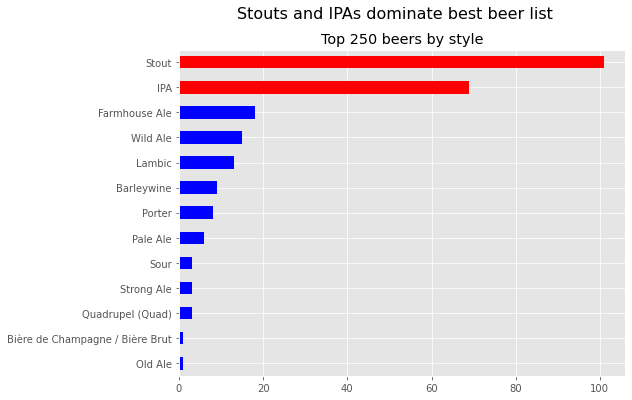

In [306]:
beer_df['general_style'].value_counts().sort_values().plot(kind='barh',
                                             title='Top 250 beers by style',
                                             figsize=(8, 6),
                                            color=['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'r']
                                            )
plt.suptitle('Stouts and IPAs dominate best beer list', fontsize=16)
plt.savefig('stout_ipa.png')
plt.show()

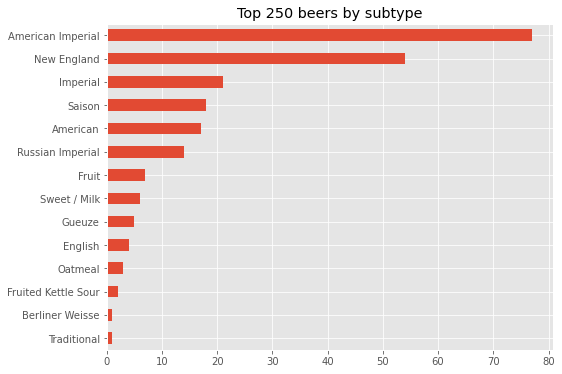

In [307]:
beer_df['substyle'].value_counts().sort_values().plot(kind='barh',
                                        title='Top 250 beers by subtype',
                                        figsize=(8, 6),
                                        
                                       );

In [261]:
# beer_df['brewery'].value_counts()[:5].plot(kind='barh')
beer_df['brewery'].value_counts()[:5].sum()

88

In [210]:
beer_df.corr()

,alcohol_pct,n_ratings,avg_rating
alcohol_pct,1.000000,-0.050366,0.117680
n_ratings,-0.050366,1.000000,-0.029857
avg_rating,0.117680,-0.029857,1.000000


In [212]:
beer_df.set_index('rank', inplace=True)

In [231]:
beer_df.groupby('general_style').agg(['mean', 'median', 'count'])

C:\Users\Patrick\AppData\Local\Temp\ipykernel_19444\3376380946.py:1: FutureWarning: ['beer_name', 'brewery', 'style', 'substyle'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  beer_df.groupby('general_style').agg(['mean', 'median', 'count'])


alcohol_pct                 n_ratings          \
                                       mean median count         mean  median   
general_style                                                                   
Barleywine                        14.800000   14.0     9   876.333333   253.0   
Bière de Champagne / Bière Brut   10.000000   10.0     1   348.000000   348.0   
Farmhouse Ale                      7.183333    7.2    18   472.722222   416.0   
IPA                                8.375797    8.2    69  1890.014493  1205.0   
Lambic                             6.000000    6.0    13  1390.461538  1188.0   
Old Ale                           13.500000   13.5     1  2027.000000  2027.0   
Pale Ale                           6.483333    6.6     6  3860.500000  1773.0   
Porter                            10.675000   10.5     8  1120.000000   953.0   
Quadrupel (Quad)                  11.266667   11.3     3  6550.666667  6794.0   
Sour                               5.333333    5.5     3   341.666667   482.0   
Stout                             12.840404   12.8    99  1482.336634   540.0   
Strong Ale                        18.000000   13.0     3  1421.333333  1112.0   
Wild Ale                           6.823333    7.0    15  1529.533333   773.0   

                                      avg_rating               
                                count       mean median count  
general_style                                                  
Barleywine                          9   4.654444  4.680     9  
Bière de Champagne / Bière Brut     1   4.490000  4.490     1  
Farmhouse Ale                      18   4.569444  4.560    18  
IPA                                69   4.568696  4.560    69  
Lambic                             13   4.565385  4.540    13  
Old Ale                             1   4.550000  4.550     1  
Pale Ale                            6   4.538333  4.540     6  
Porter                              8   4.546250  4.545     8  
Quadrupel (Quad)                    3   4.526667  4.500     3  
Sour                                3   4.570000  4.560     3  
Stout                             101   4.572376  4.540   101  
Strong Ale                          3   4.513333  4.510     3  
Wild Ale                           15   4.550000  4.550    15

In [245]:
beer_df.to_csv('beeradvocate_top250.csv')